# Kanishka, 102103772, 3CO27 

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
data = pd.read_csv("data.csv")

In [3]:
max_seq_length = data["Max_Seq_Length"].values
batch_size = data["Batch_Size"].values
accuracy = data["Accuracy"].values
f1_score = data["F1_Score"].values

# Topsis on Text Classification

In [4]:
weights = np.array([0.5, 0.5, 0.3, 0.4])

In [5]:
normalized_matrix = np.column_stack(
    [
        max_seq_length / np.max(max_seq_length),
        batch_size / np.max(batch_size),
        accuracy / np.max(accuracy),
        f1_score / np.max(f1_score),
    ]
)

In [6]:
weighted_normalized_matrix = normalized_matrix * weights

ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

distance_to_ideal = np.sqrt(
    np.sum((weighted_normalized_matrix - ideal_solution) ** 2, axis=1))

distance_to_negative_ideal = np.sqrt(
    np.sum((weighted_normalized_matrix - negative_ideal_solution) ** 2, axis=1))

topsis_scores = distance_to_negative_ideal / (
    distance_to_ideal + distance_to_negative_ideal)

In [7]:
data = pd.read_csv("result.csv")
print("Model Ranking:")
sorted_data = data[["Model", "TOPSIS_Score", "Rank"]].sort_values(by="Rank")
table = tabulate(sorted_data, headers='keys', tablefmt='pretty', showindex=False)
print(table)

Model Ranking:
+-------------------------+--------------------+------+
|          Model          |    TOPSIS_Score    | Rank |
+-------------------------+--------------------+------+
|      roberta-base       |        1.0         | 1.0  |
|    xlnet-base-cased     | 0.9921736798079074 | 2.0  |
|    bert-base-uncased    | 0.9675178717349452 | 3.0  |
|     albert-base-v2      | 0.9422664870136402 | 4.0  |
| distilbert-base-uncased | 0.928425471453852  | 5.0  |
|        t5-small         | 0.0268970111501888 | 6.0  |
+-------------------------+--------------------+------+


# Plotting 

In [8]:

labels = data["Model"]
num_models = len(labels)

max_seq_length = data["Max_Seq_Length"]
batch_size = data["Batch_Size"]
accuracy = data["Accuracy"]
f1_score = data["F1_Score"]
ranks = data["Rank"]

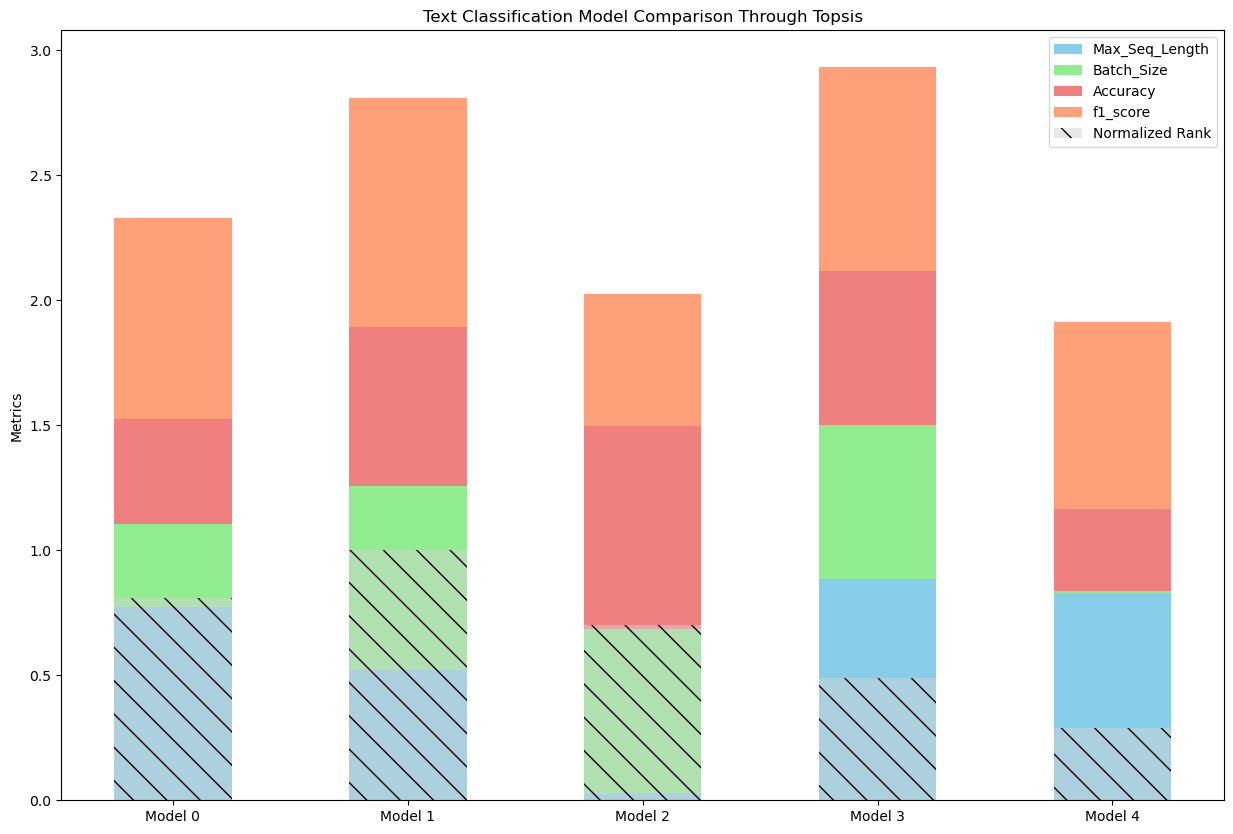

In [9]:


num_models = 5
max_seq_length = np.random.rand(num_models)
batch_size = np.random.rand(num_models)
accuracy = np.random.rand(num_models)
f1_score = np.random.rand(num_models)
ranks = np.random.rand(num_models)


normalized_ranks = ranks / np.max(ranks)

index = np.arange(num_models)
labels = [f"Model {i}" for i in range(num_models)]

fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.5

ax.bar(index, max_seq_length, width=bar_width, label="Max_Seq_Length", color="skyblue")
ax.bar(index, batch_size, width=bar_width, label="Batch_Size", bottom=max_seq_length, color="lightgreen")
ax.bar(index, accuracy, width=bar_width, label="Accuracy", bottom=max_seq_length + batch_size, color="lightcoral")
ax.bar(index, f1_score, width=bar_width, label="f1_score", bottom=max_seq_length + batch_size + accuracy, color="lightsalmon")
ax.bar(index, normalized_ranks, width=bar_width, label="Normalized Rank", color="lightgrey", alpha=0.5, hatch='\\')

ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylabel("Metrics")
ax.set_title("Text Classification Model Comparison Through Topsis")

ax.legend()
plt.savefig("BarChart.png")
plt.show()
